In [2]:
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

### Define data directory and file name to load

In [3]:
data_directory='../data/raw'
file_name='Tuesday-WorkingHours.pcap_ISCX.csv'

data_file=os.path.join(data_directory,file_name)

Tried the package loader from github clean code

In [ ]:
# from anomalyzer.config import data_file

### Load the data frame

In [9]:
df=pandas.read_csv(data_file,skipinitialspace=True,low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
Destination Port               445909 non-null int64
Flow Duration                  445909 non-null int64
Total Fwd Packets              445909 non-null int64
Total Backward Packets         445909 non-null int64
Total Length of Fwd Packets    445909 non-null int64
Total Length of Bwd Packets    445909 non-null int64
Fwd Packet Length Max          445909 non-null int64
Fwd Packet Length Min          445909 non-null int64
Fwd Packet Length Mean         445909 non-null float64
Fwd Packet Length Std          445909 non-null float64
Bwd Packet Length Max          445909 non-null int64
Bwd Packet Length Min          445909 non-null int64
Bwd Packet Length Mean         445909 non-null float64
Bwd Packet Length Std          445909 non-null float64
Flow Bytes/s                   445708 non-null object
Flow Packets/s                 445909 non-null object
Flow IAT Mean                  

In [11]:
df.rename(columns={'Flow Bytes/s':'Flow Bytes per sec',
                   'Flow Packets/s':'Flow Packets per sec',
                   'Fwd Packets/s':'Fwd Packets per sec',
                   'Bwd Packets/s':'Bwd Packets per sec',
                   'Fwd Avg Bytes/Bulk':'Fwd Avg Bytes per Bulk',
                   'Fwd Avg Packets/Bulk':'Fwd Avg Packets per Bulk',
                   'Bwd Avg Bytes/Bulk':'Bwd Avg Bytes per Bulk',
                   'Bwd Avg Packets/Bulk':'Bwd Avg Packets per Bulk',
                   'Down/Up Ratio':'Down Up Ratio'
                  },inplace=True)

### Remove NaN values from the data frame

In [38]:
clean_df=df.dropna()
clean_df.dtypes.value_counts()

int64      54
float64    22
object      3
dtype: int64

In [14]:
clean_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [37]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445708 entries, 0 to 445908
Data columns (total 79 columns):
Destination Port               445708 non-null int64
Flow Duration                  445708 non-null int64
Total Fwd Packets              445708 non-null int64
Total Backward Packets         445708 non-null int64
Total Length of Fwd Packets    445708 non-null int64
Total Length of Bwd Packets    445708 non-null int64
Fwd Packet Length Max          445708 non-null int64
Fwd Packet Length Min          445708 non-null int64
Fwd Packet Length Mean         445708 non-null float64
Fwd Packet Length Std          445708 non-null float64
Bwd Packet Length Max          445708 non-null int64
Bwd Packet Length Min          445708 non-null int64
Bwd Packet Length Mean         445708 non-null float64
Bwd Packet Length Std          445708 non-null float64
Flow Bytes per sec             445708 non-null object
Flow Packets per sec           445708 non-null object
Flow IAT Mean                  

There are still two 'object' type features in the dataset: Flow Bytes per sec and Flow Packets per sec

We now need to remove 'Infinity' values typed as string from the data.

In [64]:
index_to_drop=clean_df.index[(clean_df['Flow Packets per sec']=='Infinity')|(clean_df['Flow Bytes per sec']=='Infinity')]
print(index_to_drop)

Int64Index([   167,    172,   2439,   4058,  15297,  22891,  28757,  33942,
             35342,  38478,  41582,  44806,  45262,  48751,  61676,  63183,
             67315,  88127,  93289,  93595,  93975, 111843, 118883, 120246,
            121444, 121536, 129524, 136265, 137752, 137844, 138921, 147048,
            150093, 153792, 154300, 154805, 157396, 159859, 169208, 196971,
            198370, 200593, 206184, 210835, 212289, 215264, 215271, 216393,
            216570, 216749, 216776, 216805, 218521, 222605, 225099, 227162,
            247620, 253996, 257193, 258160, 268813, 276059, 276562],
           dtype='int64')


In [65]:
final_df=clean_df.drop(index_to_drop)

In [66]:
final_df['Flow Bytes per sec']=final_df['Flow Bytes per sec'].astype('float')
final_df['Flow Packets per sec']=final_df['Flow Packets per sec'].astype('float')

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445645 entries, 0 to 445908
Data columns (total 79 columns):
Destination Port               445645 non-null int64
Flow Duration                  445645 non-null int64
Total Fwd Packets              445645 non-null int64
Total Backward Packets         445645 non-null int64
Total Length of Fwd Packets    445645 non-null int64
Total Length of Bwd Packets    445645 non-null int64
Fwd Packet Length Max          445645 non-null int64
Fwd Packet Length Min          445645 non-null int64
Fwd Packet Length Mean         445645 non-null float64
Fwd Packet Length Std          445645 non-null float64
Bwd Packet Length Max          445645 non-null int64
Bwd Packet Length Min          445645 non-null int64
Bwd Packet Length Mean         445645 non-null float64
Bwd Packet Length Std          445645 non-null float64
Flow Bytes per sec             445645 non-null float64
Flow Packets per sec           445645 non-null float64
Flow IAT Mean                

In [84]:
features=final_df.columns.values

In [93]:
feature='Destination Port'

C:\Users\emirk\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


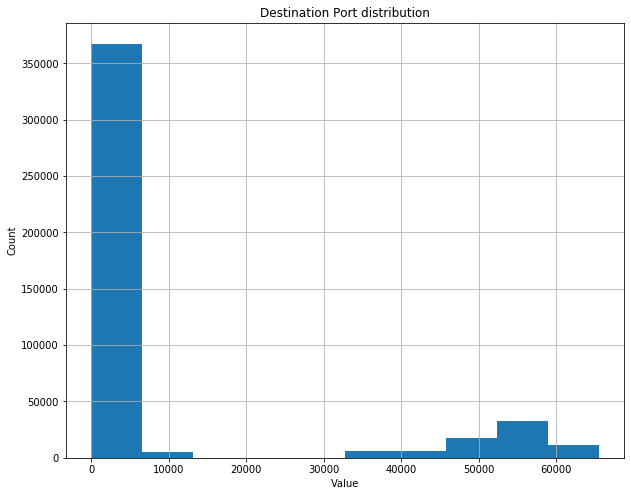

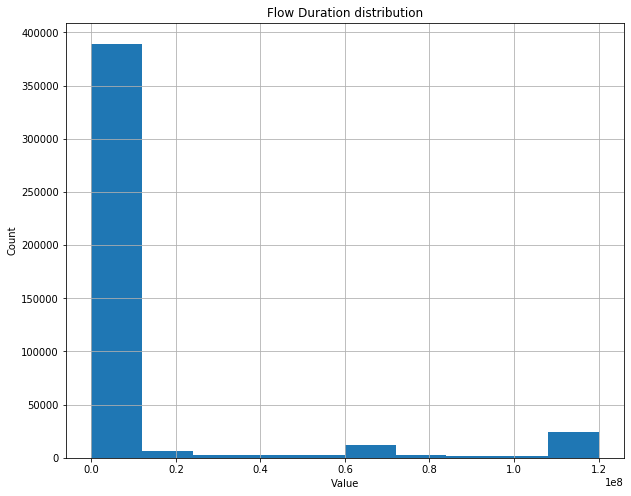

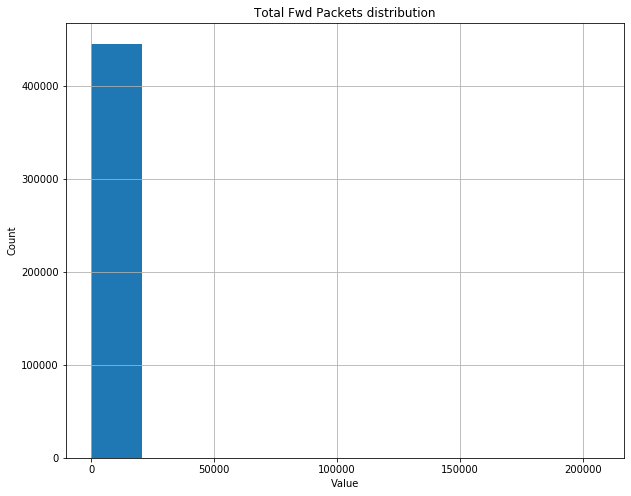

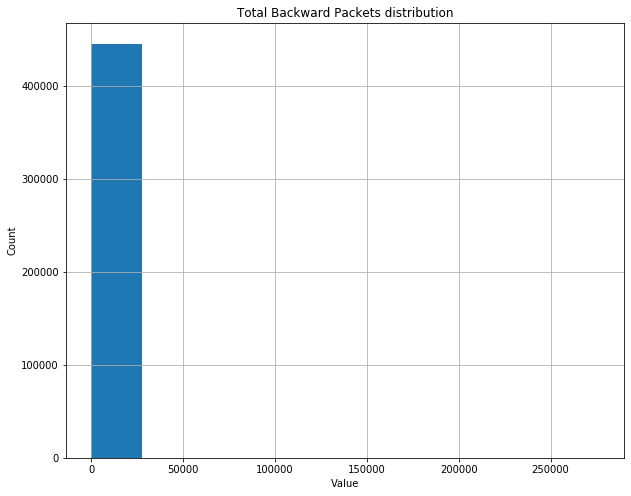

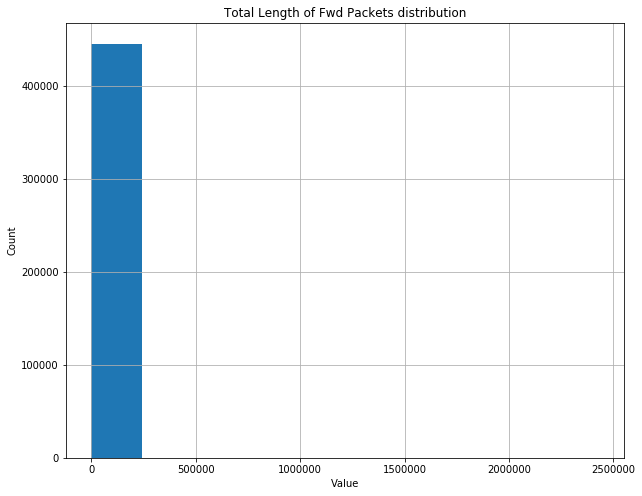

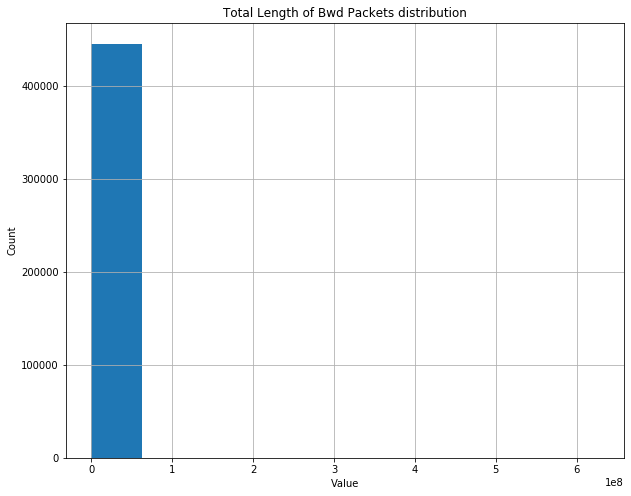

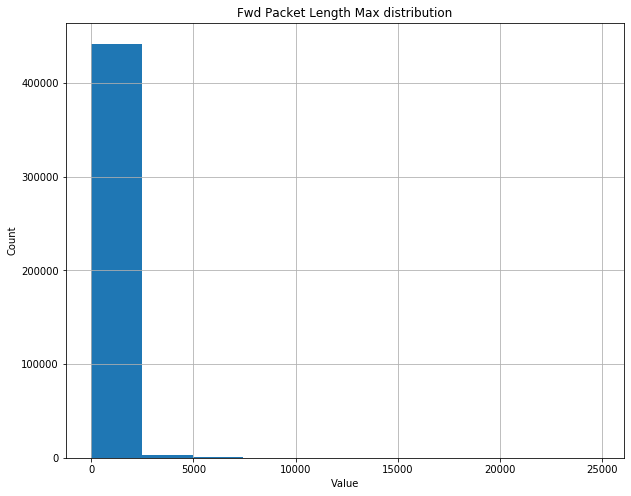

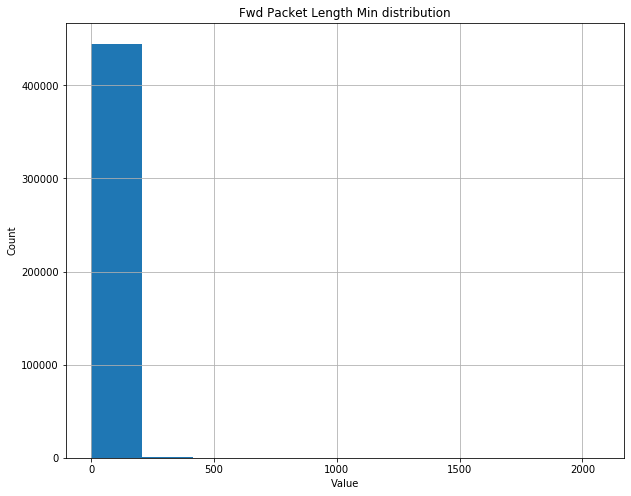

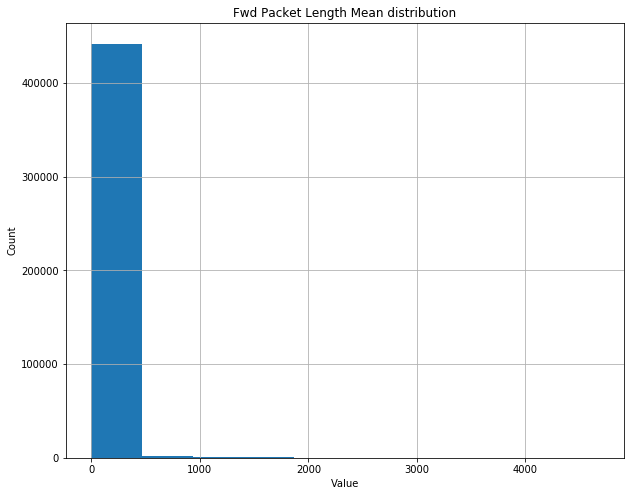

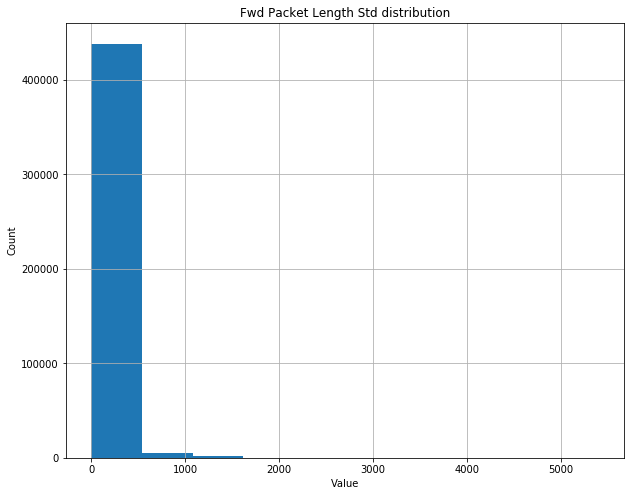

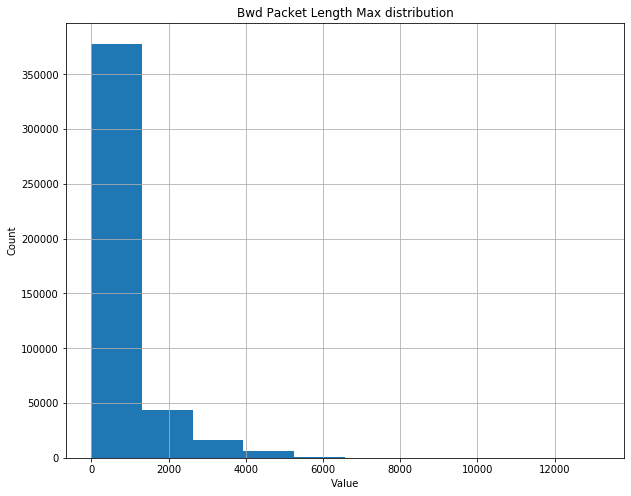

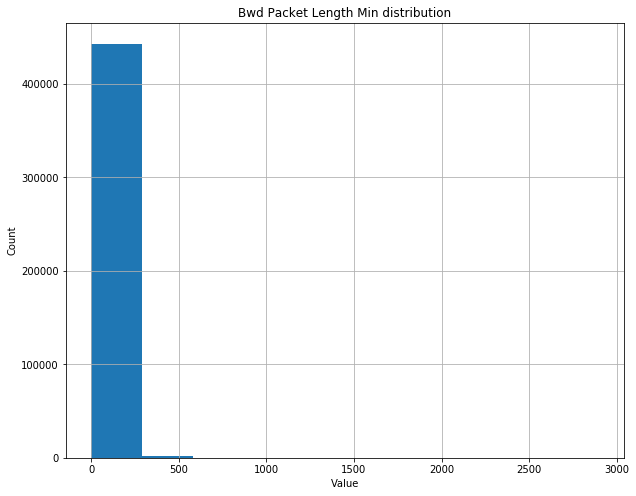

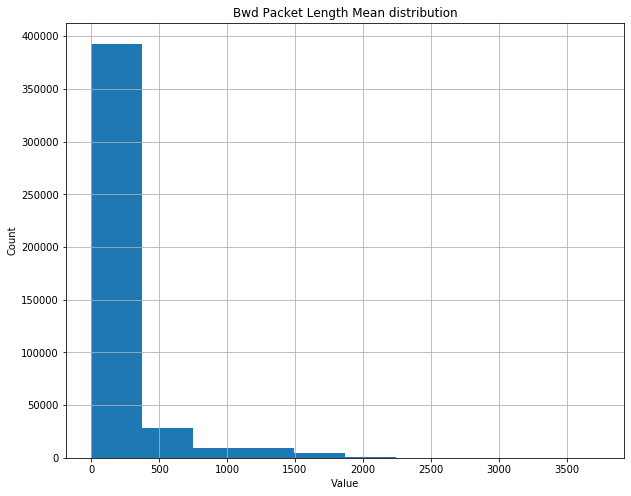

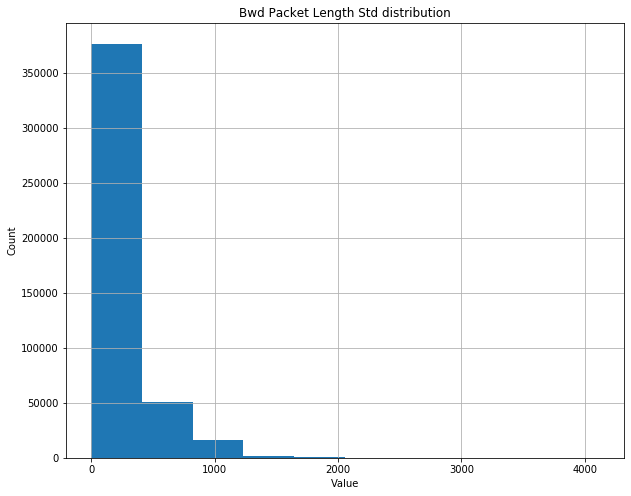

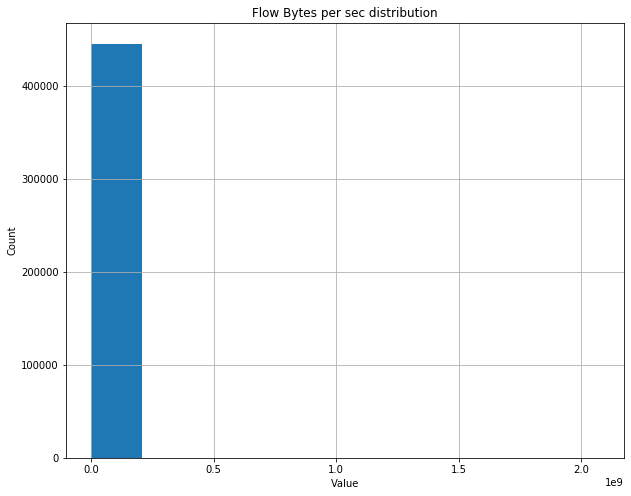

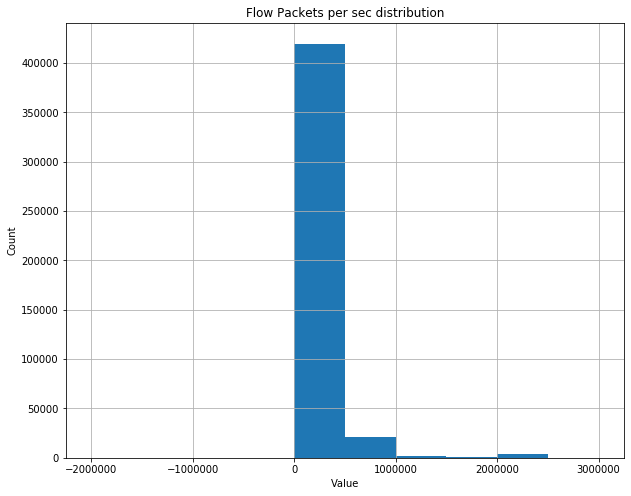

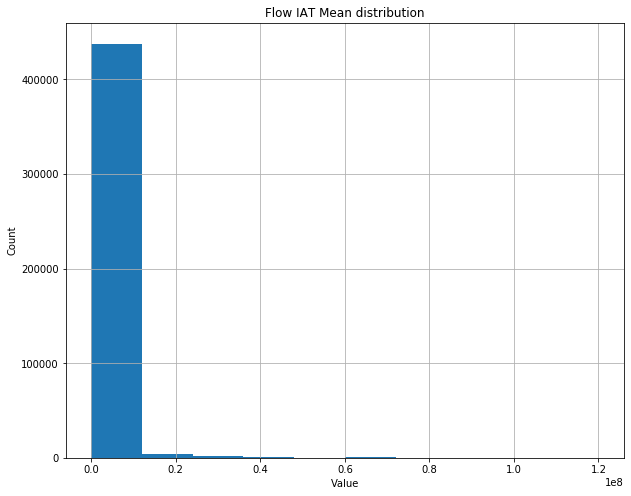

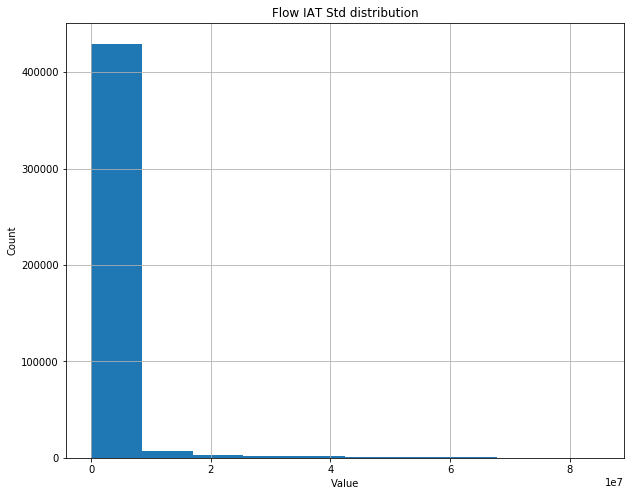

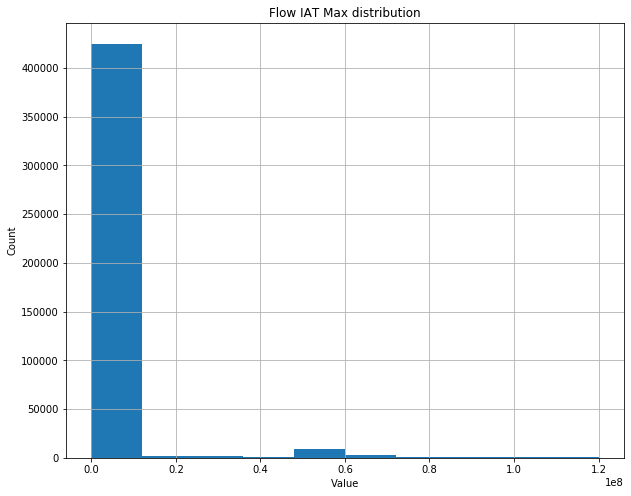

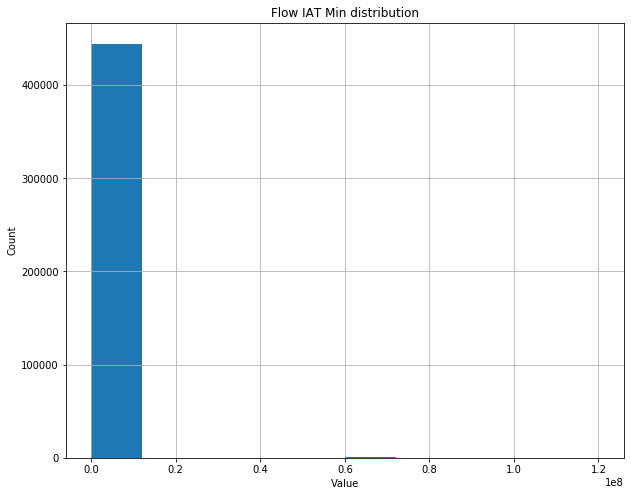

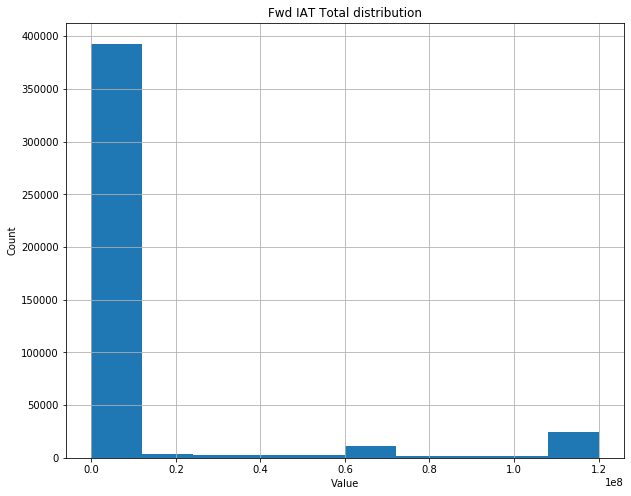

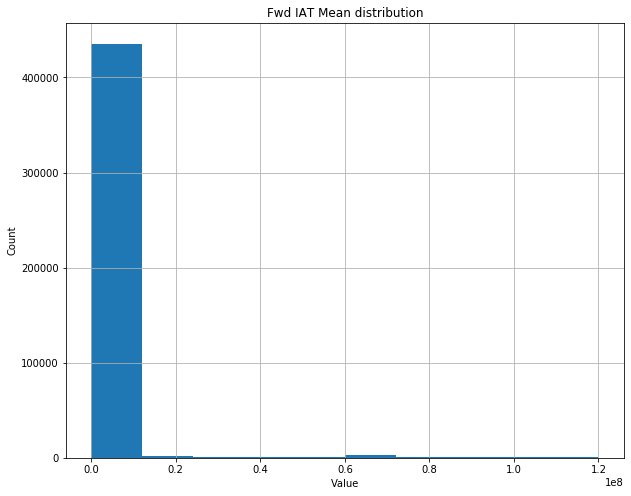

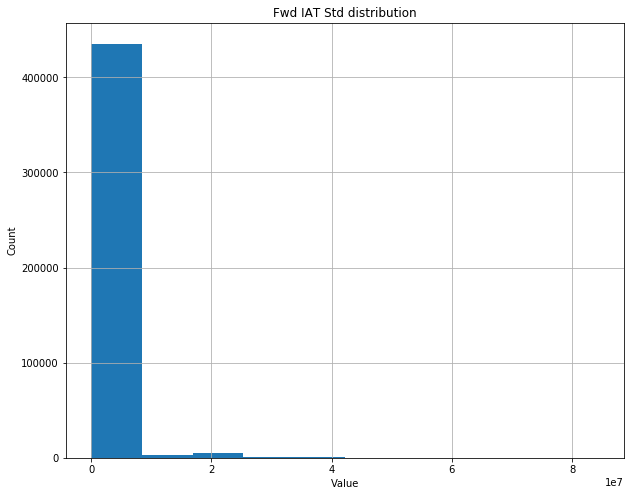

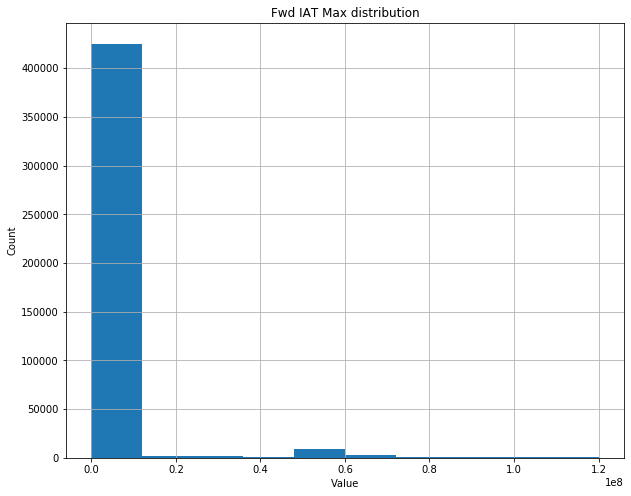

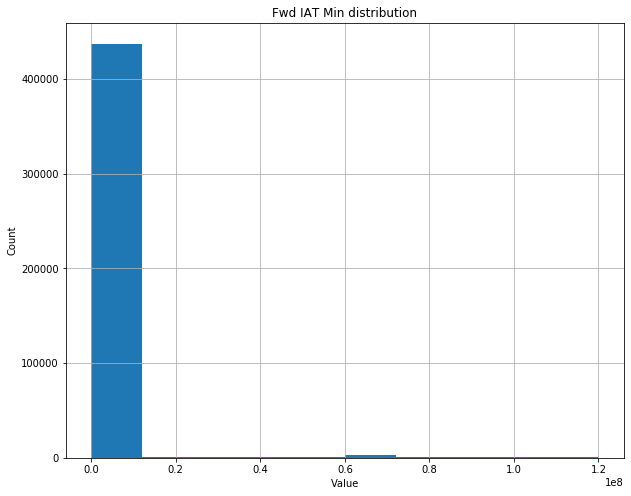

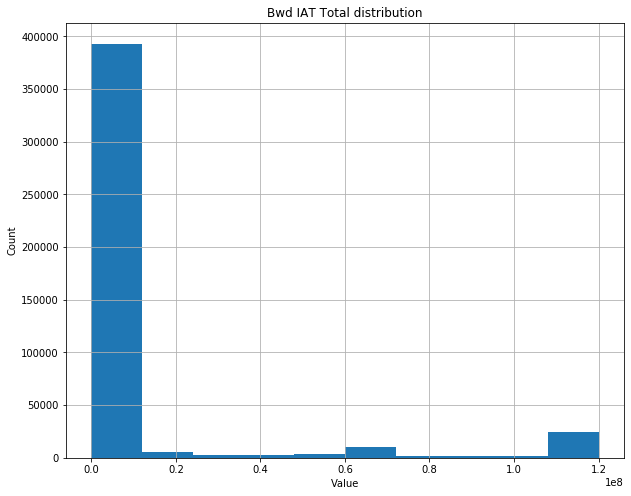

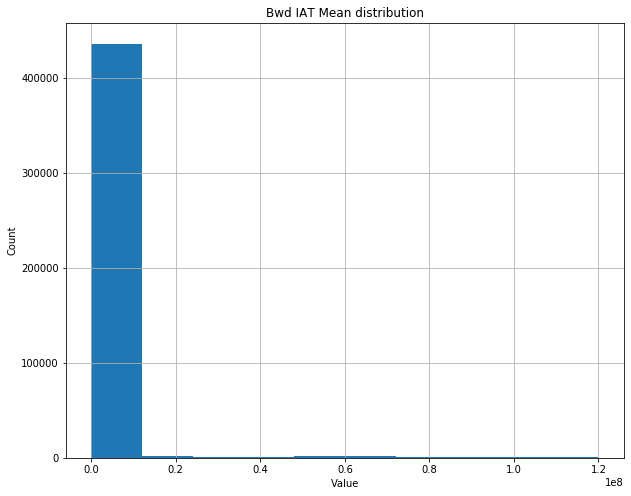

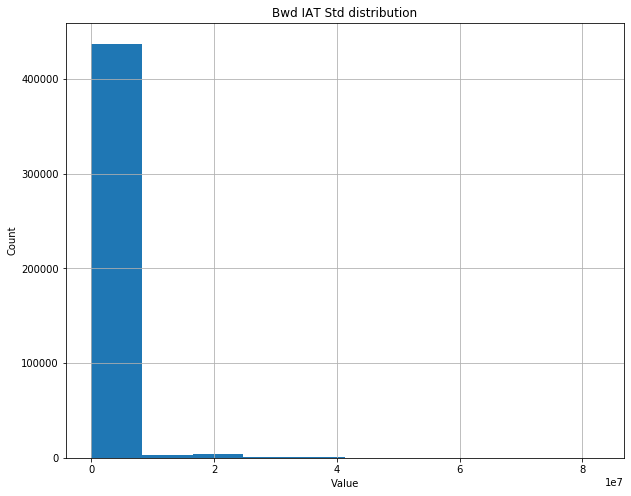

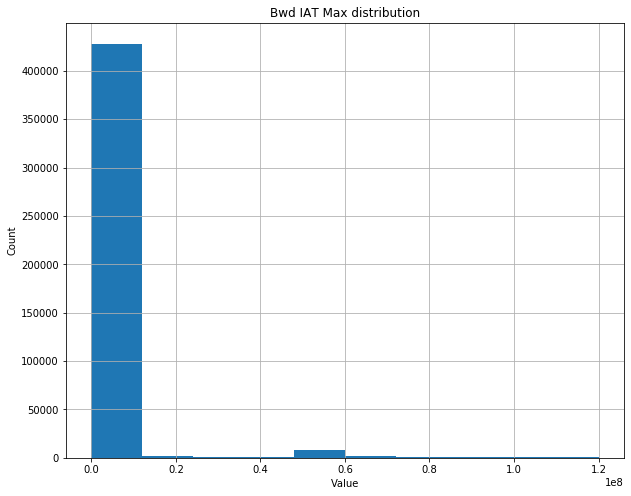

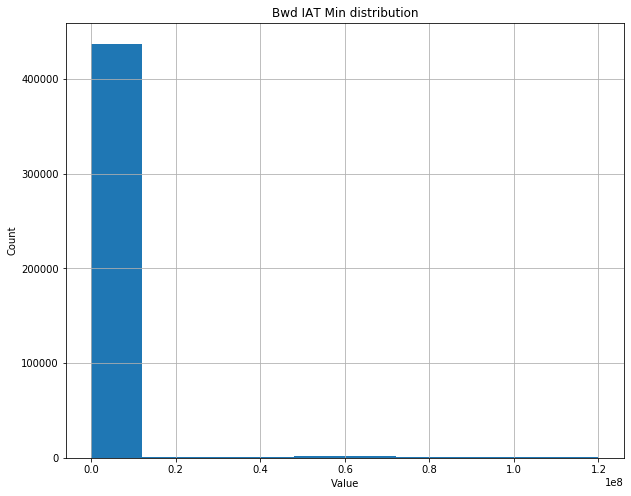

In [ ]:
for feature in features:
    fig = plt.figure()
    final_df[feature].hist()
    plt.title(feature+' distribution')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.savefig('./figures/'+feature+'.png')
    plt.close

### Scaling the features

In [ ]:
scaler=StandardScaler()
scaler.fit(np.array(clean_df['Flow Packets/s']).reshape(-1,1))
scaled_df=scaler.transform(np.array(clean_df['Flow Packets/s']).reshape(-1,1))

In [68]:
ftp_attacks=final_df.loc[final_df['Label']=='FTP-Patator']
ssh_attacks=final_df.loc[final_df['Label']=='SSH-Patator']
benign_communications=final_df.loc[final_df['Label']=='BENIGN']

In [70]:
ftp_attacks.size/df.size*100

1.7795110661592388

In [71]:
ssh_attacks.size/df.size*100

1.3224671401563997

In [72]:
benign_communications.size/df.size*100

96.83881688864768

In [73]:
benign_communications

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445904,53,155,2,2,88,120,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445905,59317,110,1,1,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445906,53,166,2,2,88,188,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445907,54726,81,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [77]:
correlation_matrix=final_df.corr()

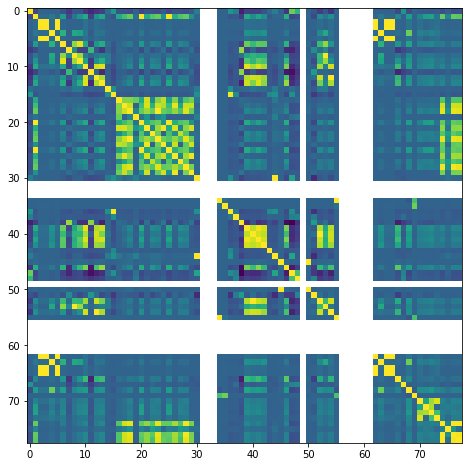

In [78]:
plt.imshow(correlation_matrix)